In [40]:
import pandas as pd
import numpy as np
import os
from functools import reduce
from ggplot import *
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
os.chdir(r"C:\Users\Administrator.ZGC-20130623RFQ\Desktop")

In [4]:
vehicles=pd.read_csv('vehicles.csv')
vehicles.head()

C:\Users\Administrator.ZGC-20130623RFQ\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (70,71,72,73,74,76,79) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


In [5]:
column_names=vehicles.columns.values
column_names[[70,71,72,73,74,76,79]]#查看红色部分警告的包含混合数据类型的列名

array(['fuelType2', 'rangeA', 'evMotor', 'mfrCode', 'c240Dscr',
       'c240bDscr', 'startStop'], dtype=object)

In [6]:
len(vehicles)

39207

In [7]:
len(vehicles.columns)#可见vehicles是一个39207*83的dataframe

83

In [8]:
print(vehicles.columns)

Index(['barrels08', 'barrelsA08', 'charge120', 'charge240', 'city08',
       'city08U', 'cityA08', 'cityA08U', 'cityCD', 'cityE', 'cityUF', 'co2',
       'co2A', 'co2TailpipeAGpm', 'co2TailpipeGpm', 'comb08', 'comb08U',
       'combA08', 'combA08U', 'combE', 'combinedCD', 'combinedUF', 'cylinders',
       'displ', 'drive', 'engId', 'eng_dscr', 'feScore', 'fuelCost08',
       'fuelCostA08', 'fuelType', 'fuelType1', 'ghgScore', 'ghgScoreA',
       'highway08', 'highway08U', 'highwayA08', 'highwayA08U', 'highwayCD',
       'highwayE', 'highwayUF', 'hlv', 'hpv', 'id', 'lv2', 'lv4', 'make',
       'model', 'mpgData', 'phevBlended', 'pv2', 'pv4', 'range', 'rangeCity',
       'rangeCityA', 'rangeHwy', 'rangeHwyA', 'trany', 'UCity', 'UCityA',
       'UHighway', 'UHighwayA', 'VClass', 'year', 'youSaveSpend', 'guzzler',
       'trans_dscr', 'tCharger', 'sCharger', 'atvType', 'fuelType2', 'rangeA',
       'evMotor', 'mfrCode', 'c240Dscr', 'charge240b', 'c240bDscr',
       'createdOn', 'modifiedOn

In [9]:
len(pd.unique(vehicles.year))#dataset包含35年份的数据

35

In [10]:
min(vehicles.year)

1984

In [11]:
max(vehicles['year'])

2018

In [12]:
pd.value_counts(vehicles.fuelType1)#汽车使用的主要燃料类型

Regular Gasoline     26977
Premium Gasoline     10846
Diesel                1092
Electricity            142
Midgrade Gasoline       90
Natural Gas             60
Name: fuelType1, dtype: int64

In [13]:
pd.value_counts(vehicles.trany)#汽车的变速箱种类

Automatic 4-spd                     11045
Manual 5-spd                         8338
Automatic 3-spd                      3151
Automatic (S6)                       2874
Manual 6-spd                         2580
Automatic 5-spd                      2198
Automatic 6-spd                      1524
Manual 4-spd                         1483
Automatic (S8)                       1197
Automatic (S5)                        830
Automatic (variable gear ratios)      738
Automatic 7-spd                       695
Automatic (AM-S7)                     334
Automatic 8-spd                       324
Automatic (S7)                        294
Automatic (S4)                        233
Automatic (AM7)                       195
Automatic (AV-S6)                     174
Automatic 9-spd                       170
Automatic (A1)                        134
Automatic (AM6)                       122
Automatic (AM-S6)                     109
Automatic (AV-S7)                      99
Manual 7-spd                      

In [14]:
vehicles['trany2']=vehicles.trany.str[0]
pd.value_counts(vehicles.trany2)#A-自动挡，M-手动挡

A    26608
M    12588
Name: trany2, dtype: int64

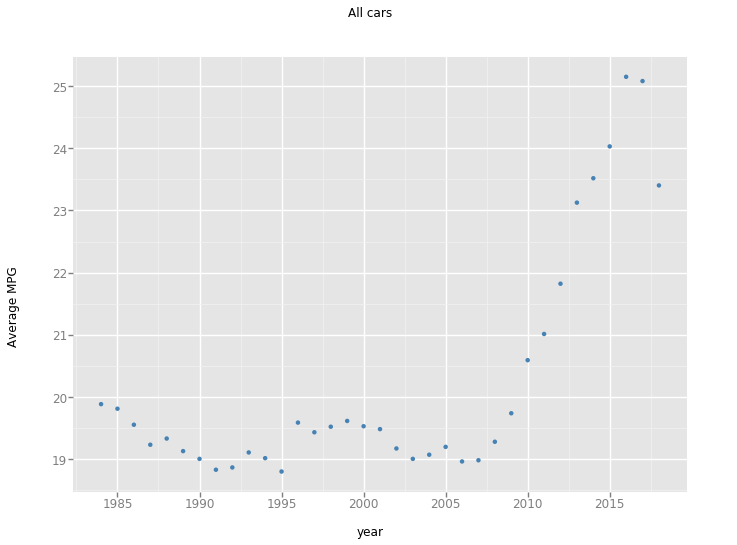

<ggplot: (-9223371870988327897)>

In [15]:
#分析油耗随时间变化趋势
#平均每加仑里程数随时间变化的总体趋势
grouped=vehicles.groupby('year')
averaged=grouped['comb08','highway08','city08'].agg([np.mean])
averaged.columns=['comb08_mean','highway08_mean','city08_mean']
averaged['year']=averaged.index
ggplot(averaged,aes('year','comb08_mean'))+geom_point(color='steelblue')+xlab('year')+ylab('Average MPG')+ggtitle('All cars')

In [16]:
#可以看到油耗近年来的显著上升，据此推测：
#1、油耗严重的混合动力汽车最近变得很流行
#   去除混合动力汽车
criterial1=vehicles.fuelType1.isin(['Regular Gasoline','Premium Gasoline','Midgrade Gasoline'])#选择fuelType1为普通、优质、降解的行
criterial2=vehicles.fuelType2.isnull()#选择fuelType2为null
criterial3=vehicles.atvType!='Hybrid'#保证atvType不是混合动力
vehicles_non_hybrid=vehicles[criterial1&criterial2&criterial3]

In [17]:
len(vehicles_non_hybrid)

35914

In [18]:
grouped=vehicles_non_hybrid.groupby(['year'])
averaged=grouped['comb08'].agg(np.mean)
print(averaged)

year
1984    19.121622
1985    19.394686
1986    19.320457
1987    19.164568
1988    19.367607
1989    19.141964
1990    19.031459
1991    18.838060
1992    18.861566
1993    19.137383
1994    19.092632
1995    18.872591
1996    19.530962
1997    19.368000
1998    19.329545
1999    19.239759
2000    19.169345
2001    19.075058
2002    18.950270
2003    18.761711
2004    18.967339
2005    19.005510
2006    18.786398
2007    18.987512
2008    19.191781
2009    19.738095
2010    20.466736
2011    20.838219
2012    21.407328
2013    22.228877
2014    22.279835
2015    22.418539
2016    22.742509
2017    22.812613
2018    22.934758
Name: comb08, dtype: float64


In [19]:
#2、近年来是否大引擎的汽车越来越少
pd.unique(vehicles_non_hybrid.displ)#displ:按升计的引擎排量

array([ 2. ,  4.9,  2.2,  5.2,  1.8,  1.6,  2.3,  2.8,  4. ,  5. ,  3.3,
        3.1,  3.8,  4.6,  3.4,  3. ,  5.9,  2.5,  4.5,  6.8,  2.4,  2.9,
        5.7,  4.3,  3.5,  5.8,  3.2,  4.2,  1.9,  2.6,  7.4,  3.9,  1.5,
        1.3,  4.1,  8. ,  6. ,  3.6,  5.4,  5.6,  1. ,  2.1,  1.2,  6.5,
        2.7,  4.7,  5.5,  1.1,  5.3,  4.4,  3.7,  6.7,  4.8,  1.7,  6.2,
        8.3,  1.4,  6.1,  7. ,  8.4,  6.3,  nan,  6.6,  6.4,  0.9])

In [20]:
#去掉空值
criterial=vehicles_non_hybrid.displ.notnull()
vehicles_non_hybrid=vehicles_non_hybrid[criterial]
vehicles_non_hybrid.displ=vehicles_non_hybrid.displ.astype('float')#以防万一，统一数据类型

C:\Users\Administrator.ZGC-20130623RFQ\Anaconda3\lib\site-packages\pandas\core\generic.py:2999: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [21]:
criterial=vehicles_non_hybrid.comb08.notnull()
vehicles_non_hybrid=vehicles_non_hybrid[criterial]
vehicles_non_hybrid.comb08=vehicles_non_hybrid.comb08.astype('float')

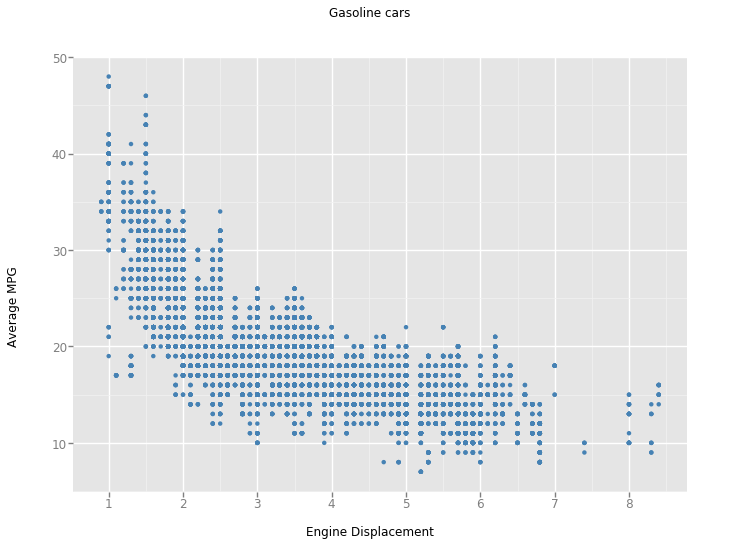

<ggplot: (-9223371870988252377)>

In [22]:
ggplot(vehicles_non_hybrid,aes('displ','comb08'))+geom_point(color='steelblue')+xlab('Engine Displacement')+ylab('Average MPG')+ggtitle('Gasoline cars')

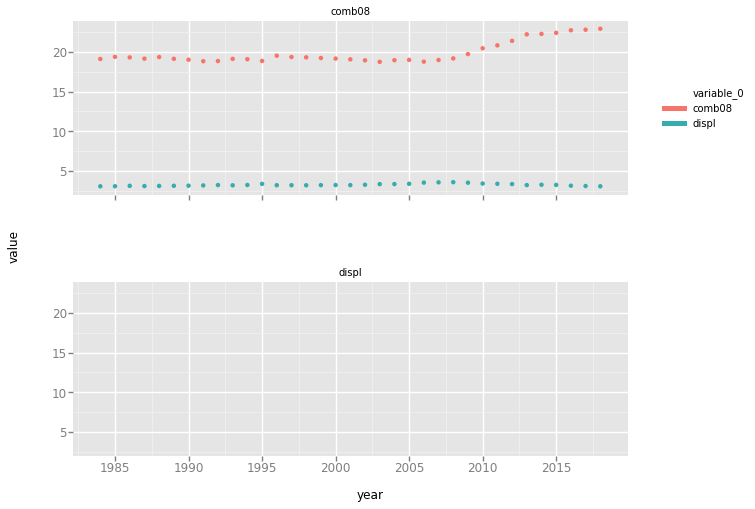

<ggplot: (165866678711)>

In [24]:
#上图显示油耗经济型和引擎排量之间的负相关性
#3、是否大引擎的汽车近年来制造得更少了
grouped_by_year=vehicles_non_hybrid.groupby(['year'])
avg_grouped_by_year=grouped_by_year['displ','comb08'].agg([np.mean])
avg_grouped_by_year['year']=avg_grouped_by_year.index
melt_avg_grouped_by_year=pd.melt(avg_grouped_by_year,id_vars='year')#改造avg_grouped_by_year的datafrme，将它从宽的格式转化为长的格式
p=ggplot(aes(x='year',y='value',color='variable_0'),data=melt_avg_grouped_by_year)
p+geom_point()+facet_wrap("variable_0")

In [45]:
#for name,group in grouped_by_year:
#    print(name)
#    print(group)

In [29]:
#调查汽车的制造商和型号
#1、观察汽车的品牌和型号如何影响油耗随时间变化的趋势
#1.1 四缸引擎汽车在美国市场出现各品牌和型号的频次
pd.unique(vehicles_non_hybrid.cylinders)

array([  4.,  12.,   8.,   6.,   5.,  10.,   2.,   3.,  16.,  nan])

In [30]:
vehicles_non_hybrid.cylinders=vehicles_non_hybrid.cylinders.astype('float')
pd.unique(vehicles_non_hybrid.cylinders)

array([  4.,  12.,   8.,   6.,   5.,  10.,   2.,   3.,  16.,  nan])

In [31]:
vehicles_non_hybrid_4=vehicles_non_hybrid[(vehicles_non_hybrid.cylinders==4.0)]

Axes(0.125,0.125;0.775x0.755)


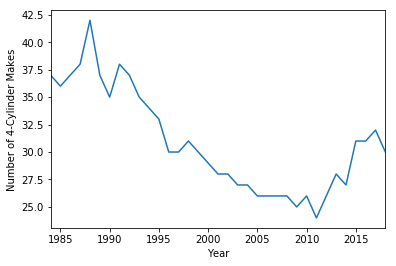

In [36]:
grouped_by_year_4_cylinder=vehicles_non_hybrid_4.groupby(['year']).make.nunique()
fig=grouped_by_year_4_cylinder.plot()
fig.set_xlabel('Year')
fig.set_ylabel('Number of 4-Cylinder Makes')
print(fig)

In [41]:
#上图可知，1985年以来，四缸引擎汽车的品牌数量呈下降趋势
#然而我们并不知道汽车品牌总数是否在同期发生变化
#所以接下来观察每年的汽车品牌数
#首先看看各年有四缸引擎汽车的品牌列表
grouped_by_year_4_cylinder=vehicles_non_hybrid_4.groupby(['year'])

unique_makes=[]
for name,group in grouped_by_year_4_cylinder:
    unique_makes.append(set(pd.unique(group['make'])))
    
unique_makes=reduce(set.intersection,unique_makes)
print(unique_makes)#在此期间只有10家制造商每年都制造四缸引擎汽车

{'Honda', 'Mazda', 'Jeep', 'Chevrolet', 'Subaru', 'Dodge', 'Volkswagen', 'Nissan', 'Ford', 'Toyota'}


In [42]:
#接着来看这些这些汽车生产商的型号随时间的油耗表现
boolean_mask=[]#将在10家制造商set中的每行的boolean加到boolean_mask中
for index,row in vehicles_non_hybrid_4.iterrows():
    make=row['make']
    boolean_mask.append(make in unique_makes)

df_common_makes=vehicles_non_hybrid_4[boolean_mask]

In [43]:
#按year和make分组,计算各组的均值
df_common_makes_grouped=df_common_makes.groupby(['year','make']).agg(np.mean).reset_index()

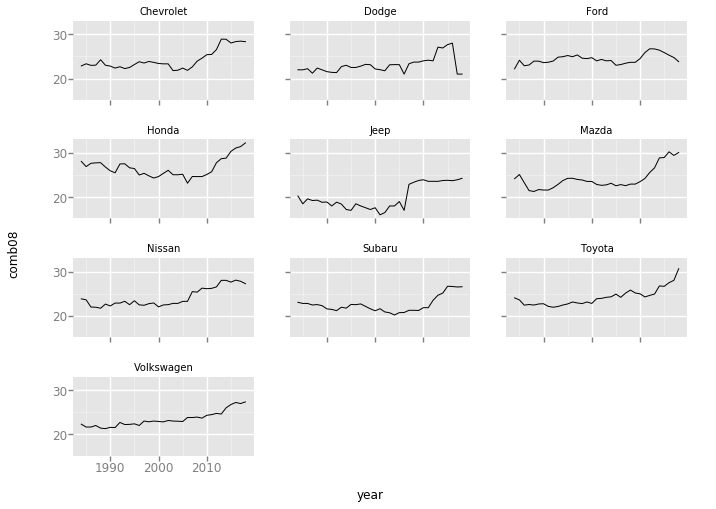

<ggplot: (-9223371870976906720)>

In [44]:
ggplot(aes(x='year',y='comb08'),data=df_common_makes_grouped)+geom_line()+facet_wrap('make')